## <center>Разведывательный анализ данных в Pandas (история олимпийских игр)
    
Данные содержат следующие признаки:

* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/olympics/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


*Hint:* возможно, в некоторых случаях нужно избавиться от дубликатов, чтобы учитывать одного атлета только один раз. Ниже пример как это сделать. Например, удалим все дубликаты атлетов.


In [ ]:
display(data.shape[0])
display(data.drop_duplicates('Name').shape[0])

271116

134732

Можно удалять полные дубликаты, а можно дубликаты по нескольким колонкам (например, удалять не все дубликаты атлетов, а оставлять одно упоминание атлета для каждых игр)

In [ ]:
display(data.shape[0]) # всего атлетов

# всего атлетов, если не учитывать записи с одинаковым именем для одинаковых игр
display(data.drop_duplicates(['Name', 'Games']).shape[0]) 

# всего атлетов, если не учитывать дубликаты по имени, росту и возрасту
display(data.drop_duplicates(['Name', 'Age', 'Height']).shape[0]) 

271116

187297

187059

Обратите внимание, что данный метод не перезаписывает данные, поэтому, чтобы сохранить измененный датафрейм, нужно записать его в переменную.

**1. Сколько лет было самым молодым участникам (мужчина и женщина) олимпийских игр в 1992 году?**


In [ ]:
print('Возраст мужчины: ',data[data['Sex'] == 'M']['Age'].min())
print('Возраст женщины: ',data[data['Sex'] == 'F']['Age'].min())

Возраст мужчины:  10.0
Возраст женщины:  11.0


__2. Какую пропорцию составляют мужчины-баскетболисты среди всех участников игр 2012 года. Округлите ответ до двух знаков.__



In [ ]:
all = (data['Year'] == 2012).sum()
basketmen = ((data['Sex'] == 'M') & (data['Sport'] == 'Basketball')).sum()
print(round(basketmen/all*100, 2),'%')

25.39 %


__3. Найдите среднее и стандартное отклонение для роста теннисисток (большой теннис), которые участвовали в играх 2000 года. Округлите ответ до второго знака.__


In [ ]:
wten = data[(data['Sex'] == 'F') & (data['Sport'] == 'Tennis') & (data['Year'] == 2000)]['Height']
print('Среднее отклонение:',round(wten.mean(), 2))
print('Стандартное отклонение',round(wten.std(), 2))

Среднее отклонение: 171.79
Стандартное отклонение 6.46


__4. Выведите названия всех уникальных дисциплин, связанных с катанием на коньках (Skating). Посчитайте их количество__ 

In [12]:
skating = data[data['Event'].str.contains(r'Skating')].drop_duplicates('Event')
display(skating[['Name', 'Event']])
print('Кол-во дисциплин: ',len(skating))

,Name,Event
4,Christine Jacoba Aaftink,Speed Skating Women's 500 metres
5,Christine Jacoba Aaftink,"Speed Skating Women's 1,000 metres"
83,Nils Egil Aaness,Speed Skating Men's 500 metres
84,Nils Egil Aaness,"Speed Skating Men's 1,500 metres"
112,Roald Edgar Aas,"Speed Skating Men's 5,000 metres"
115,Roald Edgar Aas,"Speed Skating Men's 10,000 metres"
265,Giordano Giulio Abbondati,Figure Skating Men's Singles
278,Jeremy Abbott,Figure Skating Mixed Team
778,Sarah Abitbol,Figure Skating Mixed Pairs
973,Yekaterina Konstantinovna Abramova,"Speed Skating Women's 1,500 metres"


Кол-во дисциплин:  27


__5. Найдите самую легкую атлетку игр 2006 года. В каком виде спорта она участвовала?__


In [13]:
lightw = data[(data['Sex'] == 'F') & (data['Year'] == 2006)]
lightw = lightw[lightw['Weight'] == lightw['Weight'].min()]
lightw[['Name','Weight','Sport']]

,Name,Weight,Sport
188177,Phyo Yong-Myong,38.0,Figure Skating


__6. В скольких олимпиадах принимал участие John Aalberg?__

In [14]:
John = data.drop_duplicates(['Name', 'Games'])[data['Name'] == 'John Aalberg']
display(John[['Name', 'Games']])
print('Принимал участие в',len(John), 'олимпиадах')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Games
18,John Aalberg,1992 Winter
22,John Aalberg,1994 Winter


Принимал участие в 2 олимпиадах


__7. Сколько золотых медалей настольном теннисе выиграл Китай на Олимпиаде в 2008 году?__

In [7]:
china = data[(data['Year'] == 2008) & (data['Team'] == 'China') & (data['Sport'] == 'Table Tennis') & (data['Medal'] == 'Gold')].shape[0]
print('Китай выиграл', china, 'золотых медалей')

Китай выиграл 8 золотых медалей


__8. Правда ли, что Испания выиграла меньше медалей чем Италия на играх 2016 года? Ну учитывайте NaN в колонке _Medal_.__


In [ ]:
m = (data[(((data['Team'] == 'Spain') | (data['Team'] == 'Italy')) & (data['Year'] == 2016))]).dropna(subset = ['Medal'])
print(m[m['Team'] == 'Spain'].shape[0] < m[m['Team'] == 'Italy'].shape[0])

True


__9. Найдите самую многочисленную и самую малочисленную группу по возрасту среди всех участников игр (разбейте возраст по 10 лет).__


In [ ]:
a = data['Age'].min();
min = len((data[(data['Age'] >= a) & (data['Age'] < a+10)]).drop_duplicates(['Name', 'Age']))
max = agemin = agemax = 0
while (a < data['Age'].max()):
  b = len((data[(data['Age'] >= a) & (data['Age'] < a+10)]).drop_duplicates(['Name', 'Age']))
  if (min > b): 
    min = b
    agemin = a
  if (max < b): 
    max = b
    agemax = a
  print('Возраст', a,'-', a+10, 'Кол-во людей:',b)
  a += 10;
print('Самая малочисленная группа: возраст',agemin,'-', agemin+10, '(', min, ')')
print('Самая многочисленная группа: возраст',agemax,'-', agemax+10,'(', max, ')')

Возраст 10.0 - 20.0 Кол-во людей: 18110
Возраст 20.0 - 30.0 Кол-во людей: 125666
Возраст 30.0 - 40.0 Кол-во людей: 31131
Возраст 40.0 - 50.0 Кол-во людей: 4424
Возраст 50.0 - 60.0 Кол-во людей: 961
Возраст 60.0 - 70.0 Кол-во людей: 256
Возраст 70.0 - 80.0 Кол-во людей: 49
Возраст 80.0 - 90.0 Кол-во людей: 5
Возраст 90.0 - 100.0 Кол-во людей: 2
Самая малочисленная группа: возраст 90.0 - 100.0 ( 2 )
Самая многочисленная группа: возраст 20.0 - 30.0 ( 125666 )


__10. Проводились ли летние олимпийские игры в Atlanta? А зимние в Squaw Valley? Верните True или False__

In [8]:
ds = (data['Season'] == 'Summer') & (data['City'] == 'Atlanta')
print('Летние олимпийские игры в Atlanta -', ds.any())

dw = (data['Season'] == 'Winter') & (data['City'] == 'Squaw Valley')
print('Зимние олимпийские игры в Squaw Valley -', dw.any())


Летние олимпийские игры в Atlanta - True
Зимние олимпийские игры в Squaw Valley - True


__11. Найдите абсолютную разницу между количеством уникальных видов спорта на играх в 1988 году и в 2002__

In [9]:
sport88 = data[data['Year'] == 1988].drop_duplicates('Sport')
sport02 = data[data['Year'] == 2002].drop_duplicates('Sport')
print('Абсолютная разница:',abs(len(sport88) - len(sport02)))

Абсолютная разница: 22


__12. Найдите, в каких годах проводились соревнования по керлингу__ 

In [15]:
cur = data[data['Sport'] == 'Curling'].drop_duplicates('Year')
display(cur[['Year', 'Sport']])

,Year,Sport
1366,2006,Curling
1519,2014,Curling
2397,1924,Curling
7358,1998,Curling
7811,2010,Curling
14488,2002,Curling


__13. Постройте распределение возраста керлингистов (мужчик), участвовавших в олимпиаде в Sochi__ 

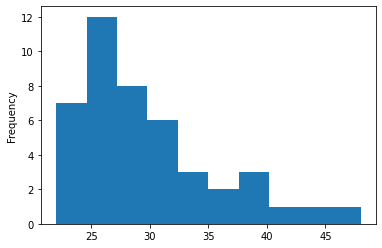

In [28]:
cmen = data[(data['Sex'] == 'M') & (data['Sport'] == 'Curling') & (data['City'] == 'Sochi')]
cmen['Age'].plot(kind ="hist")
plt.show()

__14. Выведите бар-чарт для медалей (золотые, серебряные и бронзовые) для Australia за всю историю зимних олипиад__ 

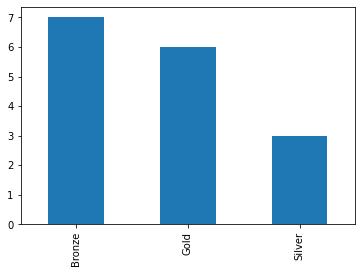

In [29]:
medals = data[(data['Season'] == 'Winter') & (data['Team'] == 'Australia')].dropna(subset = ['Medal'])
medals['Medal'].value_counts().plot(kind ="bar")
plt.show()

__15. Выведете всех уникальных спортсменов с фамилией Belov и посчитайте их количество. Заодно обратите внимание, как обозначен в данных СССР.__

In [10]:
belov = data[(data['Name'].str.contains('Belov')) & (data['Sex'] == 'M')].drop_duplicates('Name')
print('Кол-во спортсменов с фамилией Belov',len(belov))
display(belov[['Name', 'Team']])

Кол-во спортсменов с фамилией Belov 8


,Name,Team
18470,Aleksandr Aleksandrovich Belov,Soviet Union
18472,Aleksandr Belov,Russia
18474,Anton Sergeyevich Belov,Russia
18475,Nikolay Grigoryevich Belov,Soviet Union
18476,Sergey Aleksandrovich Belov,Soviet Union
18480,Vladimir Borisovich Belov,Soviet Union
18481,Yevgeny Nikolayevich Belov,Russia
18483,Yury Vladimirovich Belov,Belarus


__16. Постройте тренд общего количества медалей по годам на летних играх за всю историю участия СССР.__

Так как в командных видах спорта медали получают все члены команды, нужно удалить дубликаты соревнования, в котором получена медаль. Так соревнования могут повторяться, если представители страны выиграли медали разного достоинста, то эту операцию нужно проделать отдельно для всех типов медалей, а затем просуммировать.

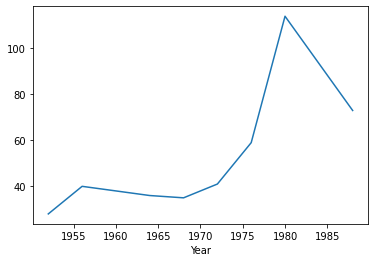

In [30]:
trend = data[(data['Team'] == 'Soviet Union') & (data['Season'] == 'Summer')].dropna(subset = ['Medal']).drop_duplicates(['Event', 'Medal']).groupby('Year').size()
trend.plot()
plt.show()

__17. Какая страна завоевала больше всех медалей в Figure Skating за всю историю.__

In [ ]:
fs = data[data['Sport'] == 'Figure Skating'].dropna(subset = ['Medal'])
fs['NOC'].value_counts().iloc[:1]

USA    66
Name: NOC, dtype: int64

__18. Выведите количество уникальных дисциплин, которые проводятся только среди мужчин, среди женщин и смешанные дисциплины (Mixed).__

In [ ]:
men = data[data['Event'].str.contains('Men')].drop_duplicates('Event')
women = data[data['Event'].str.contains('Women')].drop_duplicates('Event')
mixed = data[data['Event'].str.contains('Mixed')].drop_duplicates('Event')
print('Кол-во дисциплин: \n среди мужчин -', len(men), '\n среди женщин -', len(women), '\n смешанные дисциплины -', len(mixed))

Кол-во дисциплин: 
 среди мужчин - 464 
 среди женщин - 211 
 смешанные дисциплины - 91


__19. Выведете средний вес атлетов и атлеток, участвующих в соревнованиях по гимнастике (Gymnastics), но не учитывая художественную гимнастику (Rhythmic Gymnastics). Не учитывайте одних и тех же атлетов два раза.__

In [ ]:
men = data[(data['Sex'] == 'M') & (data['Sport'] == 'Gymnastics')].drop_duplicates(['Name', 'Height', 'Weight'])
women = data[(data['Sex'] == 'F') & (data['Sport'] == 'Gymnastics')].drop_duplicates(['Name', 'Height', 'Weight'])
print('Средний вес атлетов -', round(men['Weight'].mean()))
print('Средний вес атлеток -', round(women['Weight'].mean()))

Средний вес атлетов - 63
Средний вес атлеток - 47


__20. Проверьте, выиграла ли принимающая страна больше всего медалей, когда олимпиада проводилась в Москве. Выведите True или False__

In [ ]:
win = data[data['City'] == 'Moskva'].dropna(subset = ['Medal'])
print(win.groupby('NOC')['Medal'].size()['URS'] == win['NOC'].value_counts().max())

True
